In [1]:
import pandas as pd  
import numpy as np

In [2]:
wcat = pd.read_csv("wc-at.csv")

In [7]:
wcat

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84
...,...,...
104,100.10,124.00
105,93.30,62.20
106,101.80,133.00
107,107.90,208.00


In [9]:
wcat.describe()

,Waist,AT
count,109.000000,109.000000
mean,91.901835,101.894037
std,13.559116,57.294763
min,63.500000,11.440000
25%,80.000000,50.880000
50%,90.800000,96.540000
75%,104.000000,137.000000
max,121.000000,253.000000


In [11]:
import matplotlib.pyplot as plt

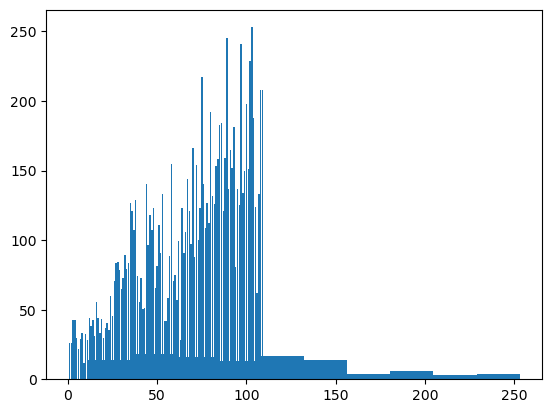

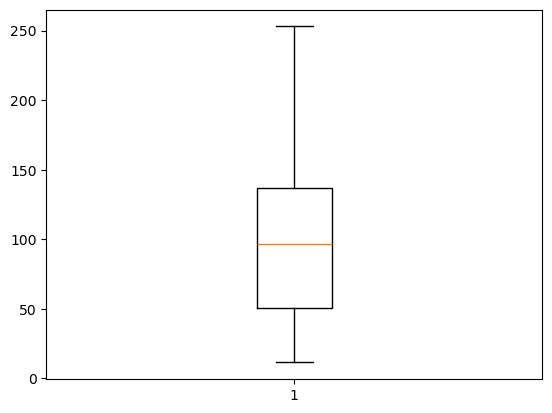

In [12]:
plt.bar(height = wcat.AT, x = np.arange(1, 110, 1))
plt.hist(wcat.AT)
plt.show()#histogram
plt.boxplot(wcat.AT) #boxplot
plt.show()

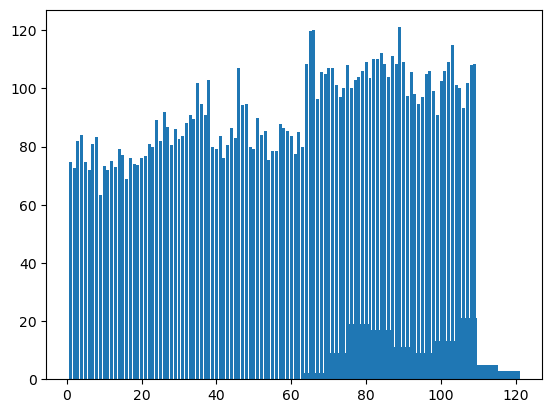

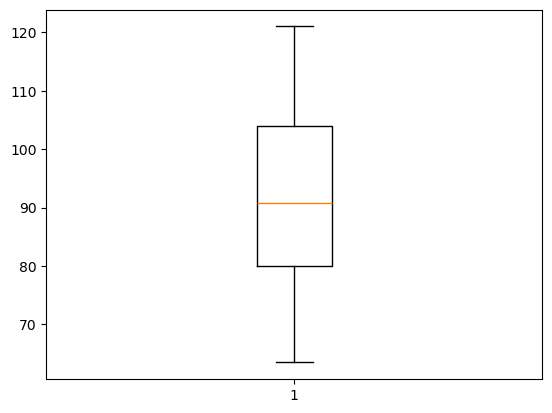

In [15]:
plt.bar(height = wcat.Waist, x = np.arange(1, 110, 1))
plt.hist(wcat.Waist) #histogram
plt.show()
plt.boxplot(wcat.Waist) #boxplot
plt.show()

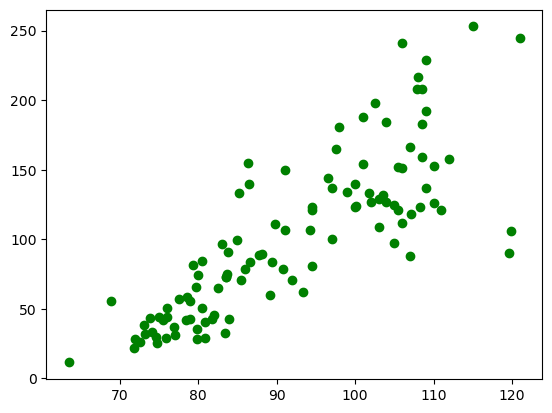

In [15]:
plt.scatter(x = wcat['Waist'], y = wcat['AT'], color = 'green') 

In [5]:
np.corrcoef(wcat.Waist, wcat.AT) 

array([[1.        , 0.81855781],
       [0.81855781, 1.        ]])

In [9]:
cov_output = np.cov(wcat.Waist, wcat.AT)[0, 1]
cov_output

635.9100064135235

In [ ]:
pip install statsmodels

In [21]:
import statsmodels.formula.api as smf

In [22]:
model = smf.ols('AT ~ Waist', data = wcat).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     AT   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     217.3
Date:                Thu, 29 Jan 2026   Prob (F-statistic):           1.62e-27
Time:                        11:09:49   Log-Likelihood:                -534.99
No. Observations:                 109   AIC:                             1074.
Df Residuals:                     107   BIC:                             1079.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -215.9815     21.796     -9.909      0.000    -259.190    -172.773
Waist          3.4589      0.235     14.740      0.000       2.994       3.924
==============================================================================
Omnibus:                        3.960   Durbin-Watson:                   1.560
Prob(Omnibus):                  0.138   Jarque-Bera (JB):                4.596
Skew:                           0.104   Prob(JB):                        0.100
Kurtosis:                       3.984   Cond. No.                         639.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
wcat.head()

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84


In [27]:
intercept=-215.9815
coef=3.4589

In [29]:
for i in range(5):
    pred_y=coef*(wcat.iloc[i,0])+intercept
    print(pred_y)

42.571274999999986
35.13463999999996
66.95651999999998
74.39315500000001
42.22538499999999


In [31]:
pred1 = model.predict(pd.DataFrame(wcat['Waist']))

In [33]:
pred1

0       42.568252
1       35.131704
2       66.953210
3       74.389758
4       42.222366
          ...    
104    130.250337
105    106.730093
106    136.130398
107    157.229440
108    159.304756
Length: 109, dtype: float64

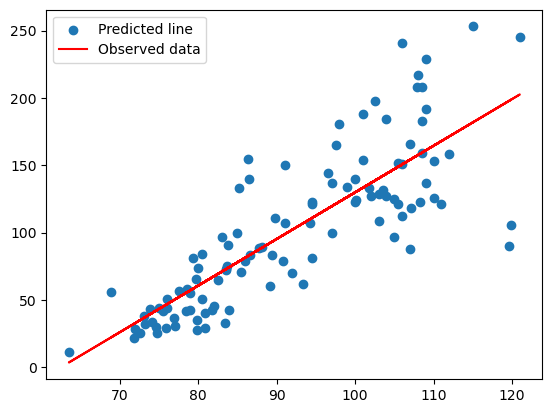

In [35]:
# Regression Line
plt.scatter(wcat.Waist, wcat.AT)
plt.plot(wcat.Waist, pred1, "r")
plt.legend(['Predicted line', 'Observed data'])
plt.show()

In [37]:
# Error calculation
res1 = wcat.AT - pred1
res_sqr1 = res1 * res1
mse1 = np.mean(res_sqr1)
rmse1 = np.sqrt(mse1)
rmse1

32.760177495755144

In [53]:
np.mean(wcat['AT'])

101.89403669724771

In [47]:
error=(rmse1/(max(wcat['AT'])-min(wcat['AT'])))

In [49]:
error

0.13561921467028956

In [51]:
print("Accuracy is", 1- error)

Accuracy is 0.8643807853297104


array([[1.        , 0.82177819],
       [0.82177819, 1.        ]])

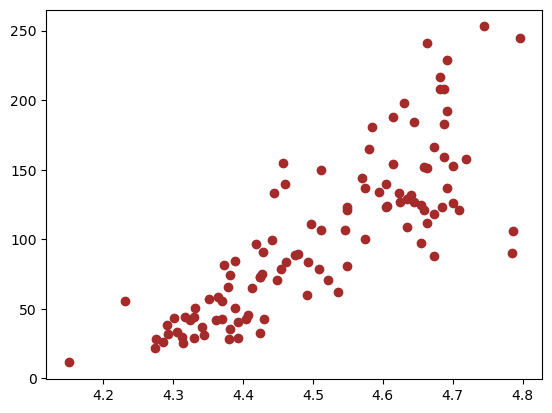

In [61]:
plt.scatter(x = np.log(wcat['Waist']), y = wcat['AT'], color = 'brown')
np.corrcoef(np.log(wcat.Waist), wcat.AT) #correlation

In [63]:
model2 = smf.ols('AT ~ np.log(Waist)', data = wcat).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     AT   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     222.6
Date:                Wed, 28 Jan 2026   Prob (F-statistic):           6.80e-28
Time:                        21:22:05   Log-Likelihood:                -534.11
No. Observations:                 109   AIC:                             1072.
Df Residuals:                     107   BIC:                             1078.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1328.3420     95.923    -13.848      0.000   -1518.498   -1138.186
np.log(Waist)   317.1356     21.258     14.918      0.000     274.994     359.277
==============================================================================
Omnibus:                        3.317   Durbin-Watson:                   1.599
Prob(Omnibus):                  0.190   Jarque-Bera (JB):                2.908
Skew:                           0.235   Prob(JB):                        0.234
Kurtosis:                       3.647   Cond. No.                         145.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
pred2 = model2.predict(pd.DataFrame(wcat['Waist']))

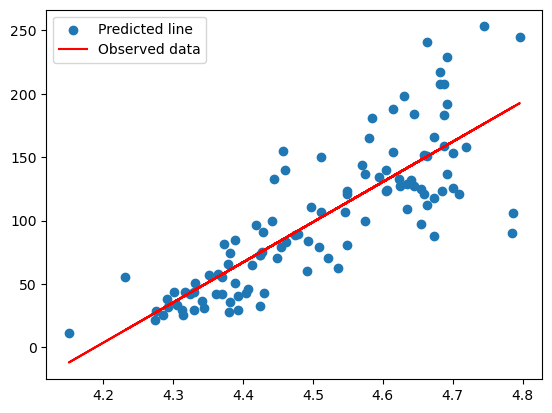

In [67]:
plt.scatter(np.log(wcat.Waist), wcat.AT)
plt.plot(np.log(wcat.Waist), pred2, "r")
plt.legend(['Predicted line', 'Observed data'])
plt.show()

In [69]:
# Error calculation
res2 = wcat.AT - pred2
res_sqr2 = res2 * res2
mse2 = np.mean(res_sqr2)
rmse2 = np.sqrt(mse2)
rmse2

32.496884909321274

array([[1.        , 0.84090069],
       [0.84090069, 1.        ]])

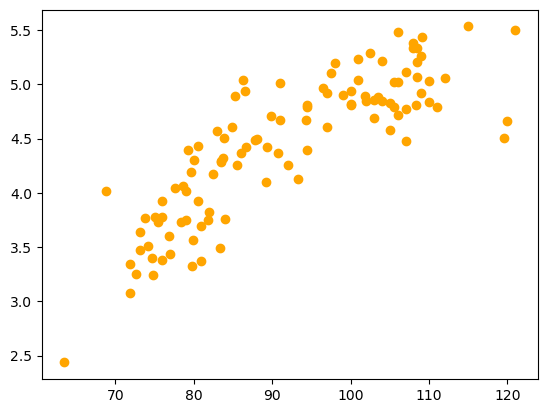

In [71]:

plt.scatter(x = wcat['Waist'], y = np.log(wcat['AT']), color = 'orange')
np.corrcoef(wcat.Waist, np.log(wcat.AT)) #correlation


In [73]:

model3 = smf.ols('np.log(AT) ~ Waist', data = wcat).fit()
model3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(AT)   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     258.3
Date:                Wed, 28 Jan 2026   Prob (F-statistic):           2.68e-30
Time:                        21:24:21   Log-Likelihood:                -40.123
No. Observations:                 109   AIC:                             84.25
Df Residuals:                     107   BIC:                             89.63
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7410      0.233      3.185      0.002       0.280       1.202
Waist          0.0403      0.003     16.073      0.000       0.035       0.045
==============================================================================
Omnibus:                        2.604   Durbin-Watson:                   1.201
Prob(Omnibus):                  0.272   Jarque-Bera (JB):                2.117
Skew:                          -0.329   Prob(JB):                        0.347
Kurtosis:                       3.182   Cond. No.                         639.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:

pred3 = model3.predict(pd.DataFrame(wcat['Waist']))
pred3_at = np.exp(pred3)
pred3_at


0       42.516361
1       38.991601
2       56.467684
3       61.572246
4       42.345566
          ...    
104    117.953181
105     89.709020
106    126.307181
107    161.459872
108    165.406833
Length: 109, dtype: float64

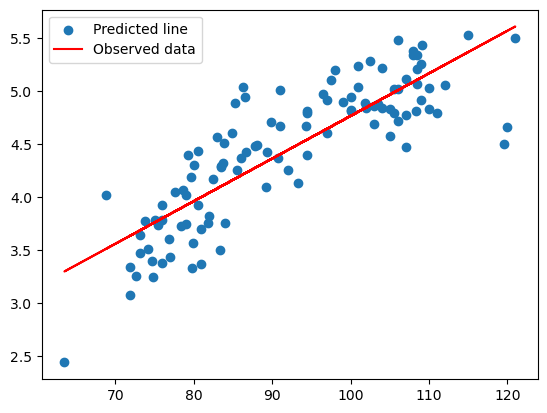

In [77]:

# Regression Line
plt.scatter(wcat.Waist, np.log(wcat.AT))
plt.plot(wcat.Waist, pred3, "r")
plt.legend(['Predicted line', 'Observed data'])
plt.show()


In [79]:

# Error calculation
res3 = wcat.AT - pred3_at
res_sqr3 = res3 * res3
mse3 = np.mean(res_sqr3)
rmse3 = np.sqrt(mse3)
rmse3

38.529001758071445

In [79]:
import numpy as np
from sklearn.linear_model import LinearRegression
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
# y = 1 * x_0 + 2 * x_1 + 3
y = np.dot(X, np.array([1, 2])) + 3

In [81]:
reg = LinearRegression().fit(X, y)

In [83]:
reg.score(X, y)

1.0

In [85]:
reg.coef_

array([1., 2.])

In [87]:
reg.intercept_

3.0

In [89]:
reg.predict(np.array([[3, 5]]))

array([16.])

In [93]:
slr=LinearRegression().fit(wcat[["Waist"]], wcat.AT)

In [109]:
print(f"Coefficients: {slr.coef_}")
print(f"Intercept: {slr.intercept_}")
print("R-squared (on training data):",slr.score(wcat[["Waist"]], wcat.AT))

Coefficients: [3.45885939]
Intercept: -215.98148796164242
R-squared (on training data): 0.6700368930528429


In [95]:
slr_predict=slr.predict(wcat[["Waist"]])

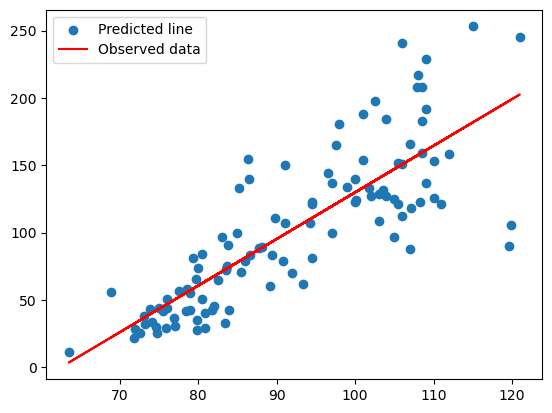

In [97]:
# Regression Line
plt.scatter(wcat.Waist, wcat.AT)
plt.plot(wcat.Waist, slr_predict, "r")
plt.legend(['Predicted line', 'Observed data'])
plt.show()

In [31]:
from sklearn.neighbors import KNeighborsRegressor

In [33]:
neigh = KNeighborsRegressor(n_neighbors=2)

In [61]:
x=wcat[['Waist']]

In [63]:
x

,Waist
0,74.75
1,72.60
2,81.80
3,83.95
4,74.65
...,...
104,100.10
105,93.30
106,101.80
107,107.90


In [37]:
y=np.ravel(wcat['AT'])

In [65]:
neigh.fit(x,wcat['AT'] )

KNeighborsRegressor(n_neighbors=2)

In [67]:
pred_knn=neigh.predict(x)

In [73]:
pred_knn

array([ 27.78 ,  32.05 ,  44.22 ,  66.765,  27.78 ,  25.   ,  34.665,
        52.77 ,  33.61 ,  35.215,  25.   ,  34.79 ,  35.215,  48.98 ,
        33.78 ,  38.73 ,  47.14 ,  38.38 ,  38.38 ,  36.545,  33.78 ,
        34.665,  54.725,  71.82 ,  44.22 ,  88.7  , 111.725,  67.59 ,
       116.945,  55.295,  72.845,  89.08 ,  92.97 ,  71.82 , 130.   ,
       122.   , 128.5  , 119.   ,  54.725,  48.98 ,  72.845,  47.14 ,
        67.59 , 111.725,  64.76 , 142.   , 114.   , 122.   ,  46.94 ,
        61.885,  97.275,  82.905, 116.365,  35.605,  49.935,  49.935,
        89.08 , 147.5  , 101.885,  82.905,  44.005, 116.365,  46.94 ,
       153.   ,  98.205,  98.205, 140.5  , 136.5  , 111.065, 126.995,
       126.995, 171.   , 118.5  , 131.5  , 212.5  , 131.5  , 119.   ,
       155.5  , 176.5  , 164.5  , 120.5  , 139.5  , 139.5  , 139.5  ,
       171.   , 155.5  , 123.5  , 171.   , 175.5  , 164.5  , 173.   ,
       136.5  , 173.   , 122.   , 118.5  , 111.065, 176.5  , 128.5  ,
       128.5  , 153.

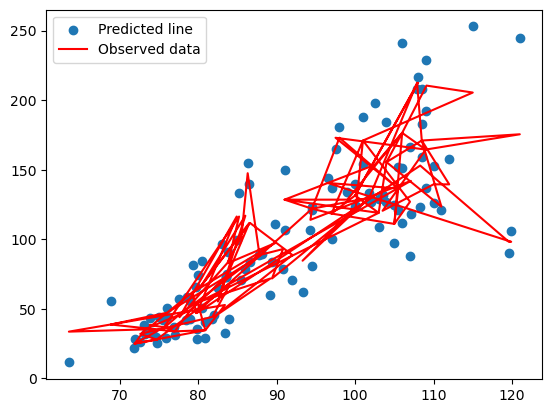

In [69]:
# Regression Line
plt.scatter(wcat.Waist, wcat.AT)
plt.plot(wcat.Waist, pred_knn, "r")
plt.legend(['Predicted line', 'Observed data'])
plt.show()